In [10]:
import time
import numpy as np
from particula import u

from particula.particle import Particle
from particula.rates import Rates
from particula.dynamics import Solver

import matplotlib.pyplot as plt

plt.rcParams.update({'text.color': "#333333",
                     'axes.labelcolor': "#333333",
                     "figure.figsize": (12,8),
                     "font.size": 14,
                     "axes.edgecolor": "#333333",
                     "axes.labelcolor": "#333333",
                     "xtick.color": "#333333",
                     "ytick.color": "#333333",
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

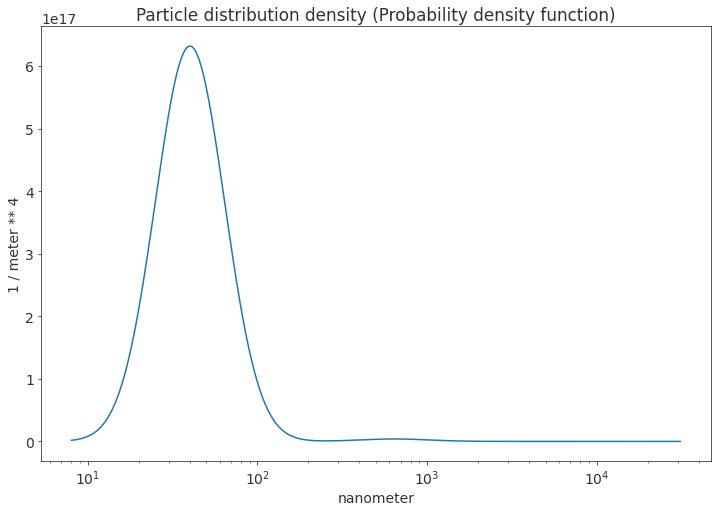

In [11]:
def plot_some(axis, x, y, grid="semilogx", title=None, label=None):
    """ plot y vs x with grid, providing title and label """
    if grid == "loglog":
        axis.loglog(x.m, y.m, label=label)
    else:
        axis.semilogx(x.m, y.m, label=label)
    if label is not None:
        axis.legend()
    axis.set_title(title)
    axis.set_xlabel(f"{x.u}"); plt.ylabel(f"{y.u}")
    return axis



specifics = {
    "mode": [50e-9, 800e-9, 5000e-9],
    "gsigma": [1.6, 1.6, 1.6],
    "nbins": 2000,
    "nparticles": [1e5,1e4,1e3], # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
}
part_dist = Particle(**specifics)

fig, ax = plt.subplots()
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=part_dist.particle_distribution(),
    title="Particle distribution density (Probability density function)",
)

In [12]:
rates_cache = Rates(particle=part_dist, cache_coagulation=True)
rates_full = Rates(particle=part_dist, )

loss_cache = rates_cache.coagulation_loss()
gain_cache = rates_cache.coagulation_gain()
net_cache = rates_cache.coagulation_rate()

# # %%
loss_full = rates_full.coagulation_loss()
gain_full = rates_full.coagulation_gain()
net_full = rates_full.coagulation_rate()

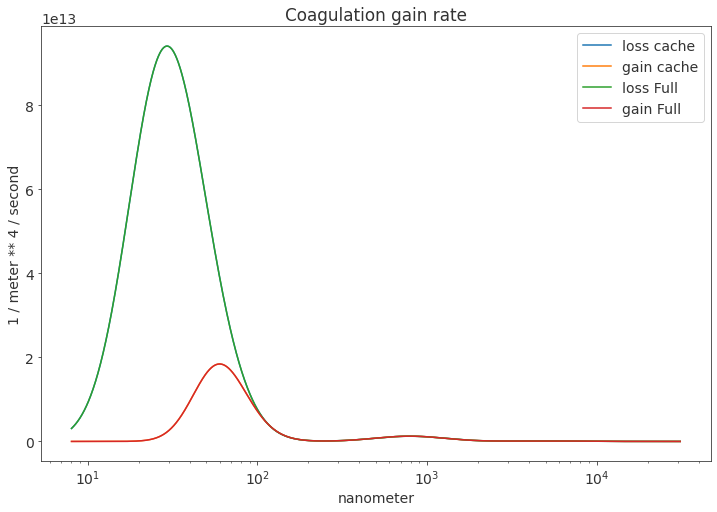

In [13]:
fig, ax = plt.subplots()
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=loss_cache,
    title="Coagulation loss rate",
    # grid="loglog",
    label='loss cache'
)
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=gain_cache,
    title="Coagulation gain rate",
    # grid="loglog",
    label='gain cache'
)
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=loss_full,
    title="Coagulation loss rate",
    # grid="loglog",
    label='loss Full'
)
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=gain_full,
    title="Coagulation gain rate",
    # grid="loglog",
    label='gain Full'
)

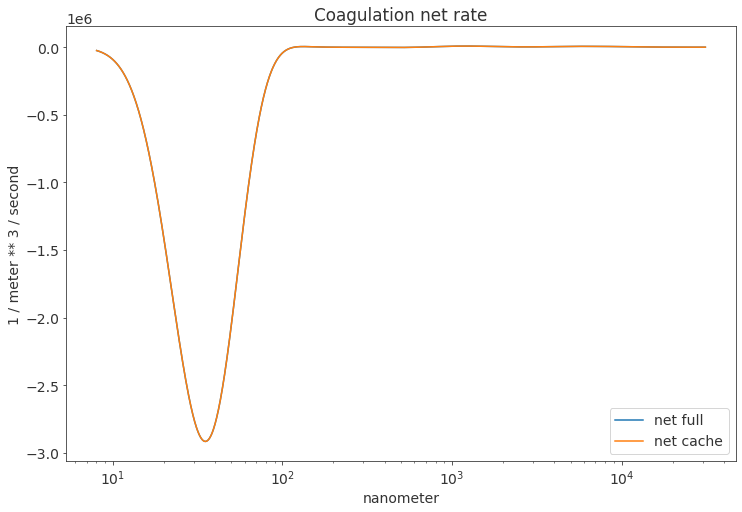

In [14]:
fig, ax = plt.subplots()
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=net_full*part_dist.particle_radius,
    title="Coagulation net rate",
    label='net full'
)
ax = plot_some(
    axis=ax,
    x=part_dist.particle_radius.to(u.nm),
    y=net_cache*part_dist.particle_radius,
    title="Coagulation net rate",
    label='net cache'
)

Time to run: 40.778714179992676
min conc: -1768863424956067.2 / meter ** 4


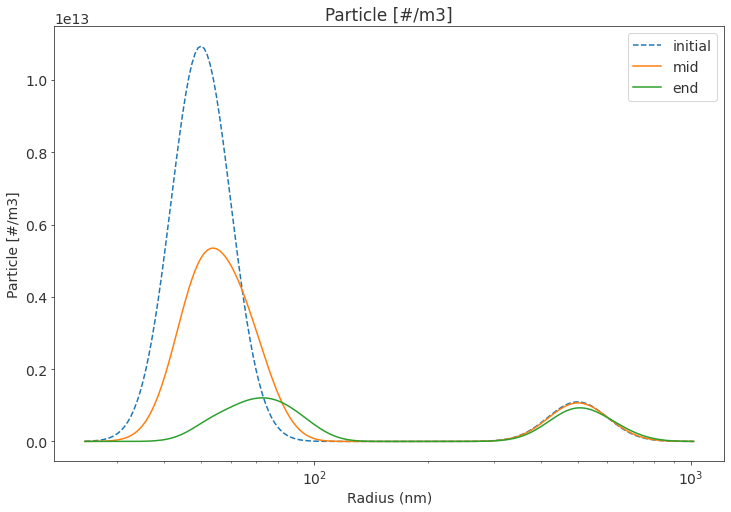

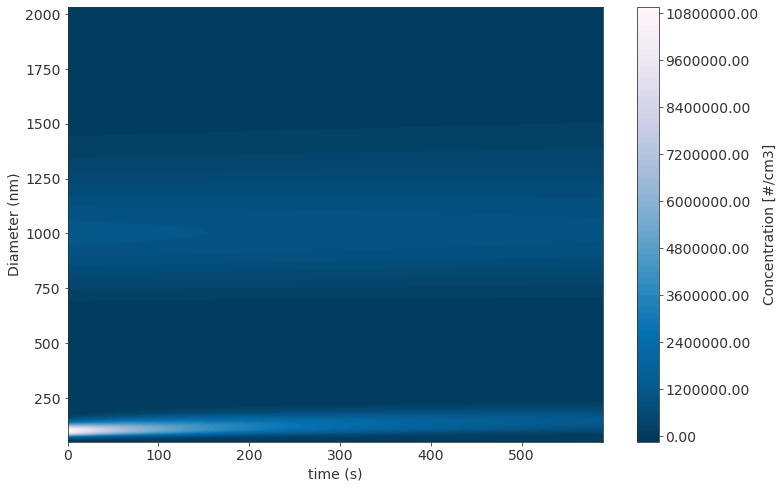

In [15]:
# time loop
start_time = time.time()

time_span = np.arange(0,600,10) # seconds


specifics = {
    "mode": [50e-9, 500e-9],
    "gsigma": [1.2, 1.2],
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": [1e7,1e6], # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "cache_coagulation": False,
    "cache_log10_round_maxloss_conc": 0.2,
    "cache_log10_round_maxloss_radius": 0.2,
}

part_dist_low = Particle(**specifics)
s = Solver(particle=part_dist_low, time_span=time_span, **specifics)
sols_low = s.solution()

end_time = time.time()
print(f"Time to run: {end_time - start_time}")
print(f"min conc: {np.min(sols_low)}")

fig, ax = plt.subplots()
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[0].m*part_dist_low.particle_radius.m, label="initial", linestyle='dashed')
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[10].m*part_dist_low.particle_radius.m, label="mid")
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[-1].m*part_dist_low.particle_radius.m, label="end")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle [#/m3]")
ax.set_title("Particle [#/m3]")
ax.legend()


concentration = np.transpose(sols_low*part_dist_low.particle_radius).to(u.cm**-3).m

fig, ax = plt.subplots(1,1)
plt.contourf(
    time_span,
    part_dist_low.particle_radius.to(u.nm).m*2,
    concentration,
    cmap=plt.cm.PuBu_r, levels=100)
ax.set_xlabel('time (s)')
ax.set_ylabel('Diameter (nm)')
plt.colorbar(label='Concentration [#/cm3]', format='%.2f')
plt.show()
fig.tight_layout()

Time to run: 106.9014744758606
min conc: -6171637486640284.0 / meter ** 4


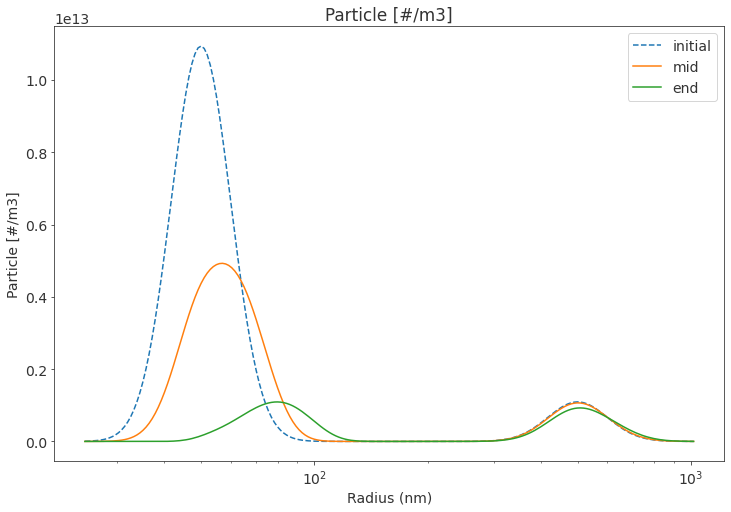

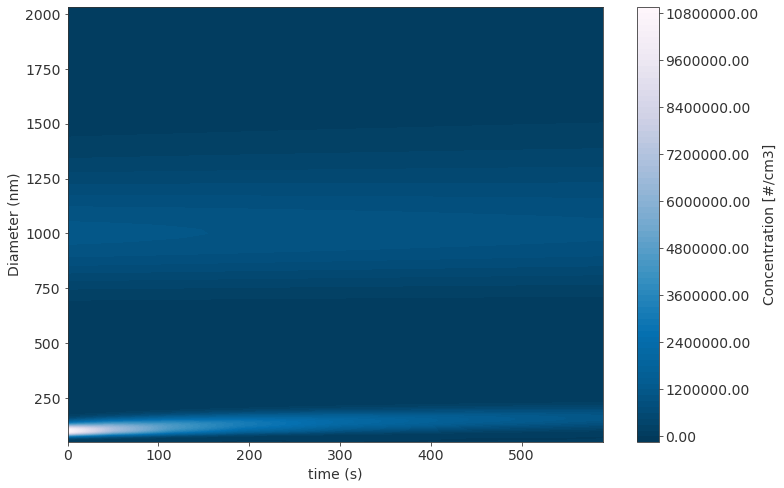

In [16]:
# time loop
start_time = time.time()

time_span = np.arange(0,600,10) # seconds


specifics = {
    "mode": [50e-9, 500e-9],
    "gsigma": [1.2, 1.2],
    "nbins": 200, # fewer bins is faster, but less accurate
    "nparticles": [1e7,1e6], # 1e4 #
    "volume": 1e-6, # /cc
    "spacing": 'logspace',
    "cache_coagulation": True,
    "cache_log10_round_maxloss_conc": 0.2,
    "cache_log10_round_maxloss_radius": 0.2,
}

part_dist_low = Particle(**specifics)
s = Solver(particle=part_dist_low, time_span=time_span, **specifics)
sols_low = s.solution()

end_time = time.time()
print(f"Time to run: {end_time - start_time}")
print(f"min conc: {np.min(sols_low)}")

fig, ax = plt.subplots()
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[0].m*part_dist_low.particle_radius.m, label="initial", linestyle='dashed')
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[10].m*part_dist_low.particle_radius.m, label="mid")
ax.semilogx(part_dist_low.particle_radius.to(u.nm).m, sols_low[-1].m*part_dist_low.particle_radius.m, label="end")
ax.set_xlabel("Radius (nm)")
ax.set_ylabel("Particle [#/m3]")
ax.set_title("Particle [#/m3]")
ax.legend()


concentration = np.transpose(sols_low*part_dist_low.particle_radius).to(u.cm**-3).m

fig, ax = plt.subplots(1,1)
plt.contourf(
    time_span,
    part_dist_low.particle_radius.to(u.nm).m*2,
    concentration,
    cmap=plt.cm.PuBu_r, levels=100)
ax.set_xlabel('time (s)')
ax.set_ylabel('Diameter (nm)')
plt.colorbar(label='Concentration [#/cm3]', format='%.2f')
plt.show()
fig.tight_layout()